# Homework 3 (classificação)

**GRUPO:**

- Gabriel Vasconcelos Fruet - 537618
- Kelvin Leandro Martins - 540006
- Mateus Pereira Santos - 541048
- Pedro Leinos Falcão Cunha - 542114

## Dados

In [1]:
!gdown 1BjPqd8oPoL_y68RthGigmeDK7SvjvTDG # reducedSet.csv
!gdown 1tsHBYB3u4OZiEabmcP_dsqDg1ivb54bP # testing.csv
!gdown 1TBNTcAjfY8zxshFGmM48ypnwiWlRm6CN # training.csv

Downloading...
From: https://drive.google.com/uc?id=1BjPqd8oPoL_y68RthGigmeDK7SvjvTDG
To: /content/reducedSet.csv
100% 3.20k/3.20k [00:00<00:00, 12.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tsHBYB3u4OZiEabmcP_dsqDg1ivb54bP
To: /content/testing.csv
100% 1.98M/1.98M [00:00<00:00, 91.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TBNTcAjfY8zxshFGmM48ypnwiWlRm6CN
To: /content/training.csv
100% 31.0M/31.0M [00:00<00:00, 71.4MB/s]


## Bibliotecas

In [2]:
! pip install tqdm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
from itertools import product

## Leitura dos dados

In [4]:
reduced_set = pd.read_csv('reducedSet.csv')
training_set = pd.read_csv('training.csv')
testing_set = pd.read_csv('testing.csv')
training_set.shape, testing_set.shape, reduced_set.shape

((8190, 1882), (518, 1882), (252, 1))

In [5]:
reduced_features = reduced_set.x.values
training_set = training_set[['Class', *reduced_features]]
testing_set = testing_set[['Class', *reduced_features]]
training_set.shape, testing_set.shape

((8190, 253), (518, 253))

In [6]:
training_set['Class']

,Class
0,successful
1,successful
2,successful
3,successful
4,unsuccessful
...,...
8185,unsuccessful
8186,unsuccessful
8187,successful
8188,successful


## Utilitárias

In [7]:
def plot_confusion_matrix(y_pred, y_true, title):
  # labels = np.unique(y_true)
  cm = confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predição")
  plt.ylabel("Verdadeiro")
  plt.title(title)
  plt.show()

def plot_roc_curve(y_test, y_pred_proba, title):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def calculate_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  recall = tp / (tp + fn)
  specificity = tn / (tn + fp)
  precision = tp / (tp + fp)
  f1_score = 2 * (precision * recall) / (precision + recall)

  print(f'Acuracia: {accuracy:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'Especificidade: {specificity:.2f}')
  print(f'Precisão: {precision:.2f}')
  print(f'F1 Score: {f1_score:.2f}')

## Pré-processamento

In [8]:
X_train = training_set.drop('Class', axis=1).values.copy()
y_train = training_set['Class'].values.copy()
X_test = testing_set.drop('Class', axis=1).values.copy()
y_test = testing_set['Class'].values.copy()

y_train = (y_train == 'successful').astype(np.int32)
y_test = (y_test == 'successful').astype(np.int32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8190, 252), (8190,), (518, 252), (518,))

In [9]:
# removendo skewness
# X_train = np.log(X_train + 1)
# X_test = np.log(X_test + 1)

pt = PowerTransformer(method='yeo-johnson', standardize=False)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelos

### Regressão logística

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred = model_lr.predict(X_test_scaled)

calculate_metrics(y_test, y_pred)

Acuracia: 0.86
Recall: 0.82
Especificidade: 0.89
Precisão: 0.81
F1 Score: 0.81


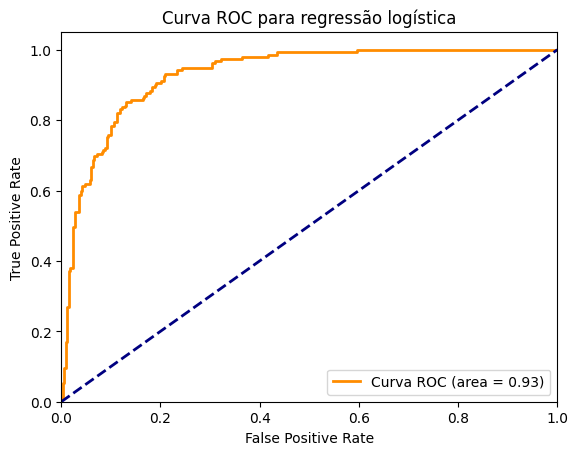

In [ ]:
y_pred_proba = model_lr.predict_proba(X_test_scaled)[:, 1]

plot_roc_curve(y_test, y_pred_proba, 'Curva ROC para regressão logística')

Number of TP: 189
Number of FP: 329


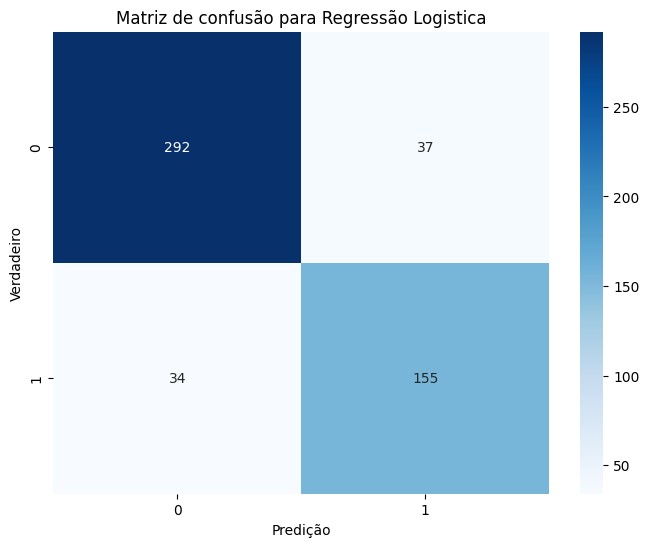

In [ ]:
plot_confusion_matrix(y_pred, y_test,'Matriz de confusão para Regressão Logistica')

### LDA

In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_scaled, y_train)

y_pred = model_lda.predict(X_test_scaled)

calculate_metrics(y_test, y_pred)

Acuracia: 0.86
Recall: 0.82
Especificidade: 0.88
Precisão: 0.80
F1 Score: 0.81


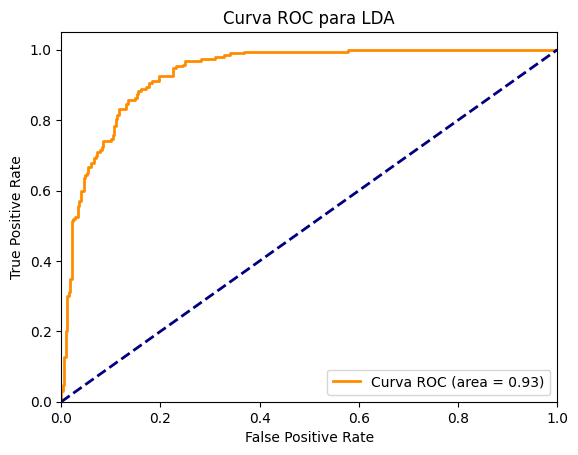

In [ ]:
y_pred_proba = model_lda.predict_proba(X_test_scaled)[:, 1]

plot_roc_curve(y_test, y_pred_proba, 'Curva ROC para LDA')

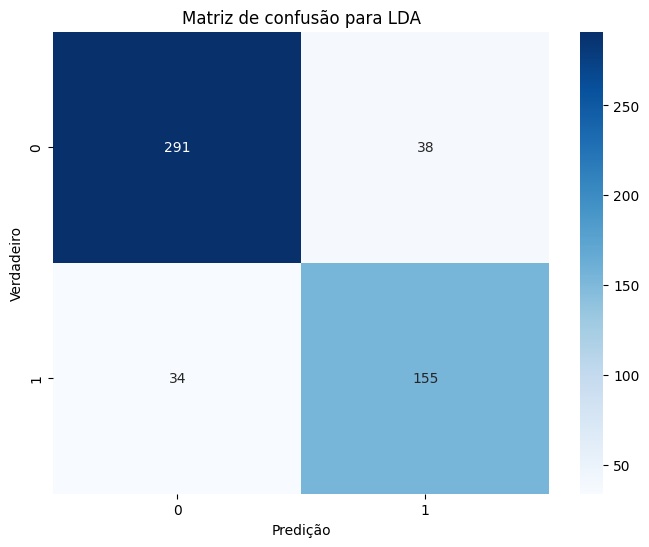

In [ ]:
plot_confusion_matrix(y_pred, y_test,'Matriz de confusão para LDA')

### QDA

In [ ]:
model_qda = QuadraticDiscriminantAnalysis(reg_param=1)
model_qda.fit(X_train_scaled, y_train)

y_pred = model_qda.predict(X_test_scaled)

calculate_metrics(y_test, y_pred)

Acuracia: 0.81
Recall: 0.88
Especificidade: 0.76
Precisão: 0.68
F1 Score: 0.77


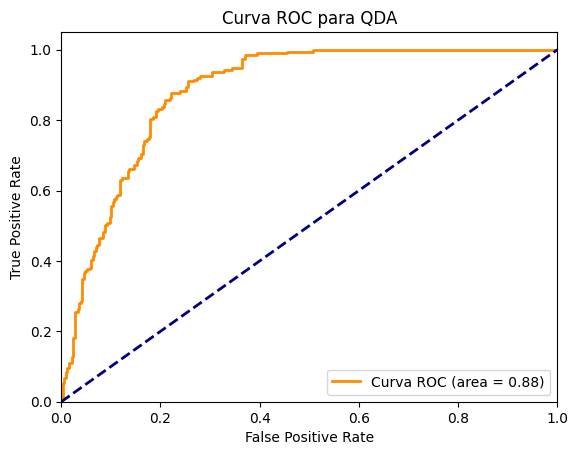

In [ ]:
y_pred_proba = model_qda.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba, 'Curva ROC para QDA')

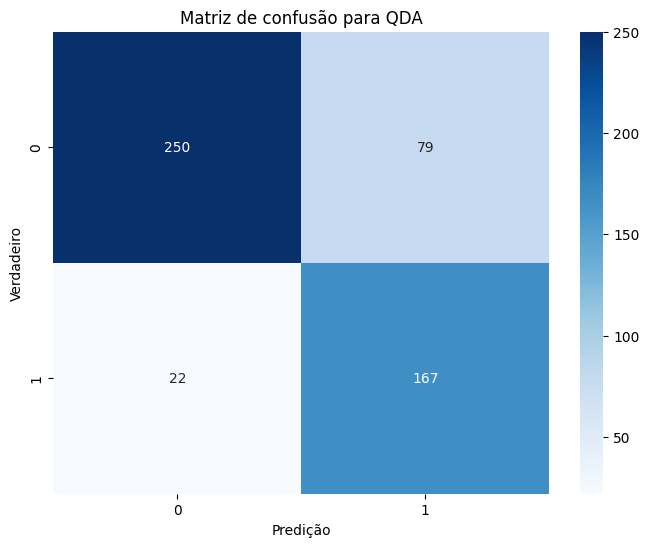

In [ ]:
plot_confusion_matrix(y_pred, y_test, 'Matriz de confusão para QDA')

### KNN

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [15, 17, 23, 25, 27, 29],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize variables to track the best model
best_score = 0
best_params = None
best_knn = None

total_combinations = len(list(product(*param_grid.values())))

# Iterate over all parameter combinations
for params in tqdm(product(*param_grid.values()), total=total_combinations, desc="Grid Search Progress"):
    param_dict = dict(zip(param_grid.keys(), params))

    # Train the model
    model_knn = KNeighborsClassifier(**param_dict)
    model_knn.fit(X_train_scaled, y_train)

    # Validate on the test set
    y_pred = model_knn.predict(X_test_scaled)
    val_accuracy = accuracy_score(y_test, y_pred)

    # Update the best model if accuracy improves
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = param_dict
        best_knn = model_knn

# Print the best results
print("Melhores parâmetros:", best_params)
print("Melhor acurácia na validação:", best_score)

print("-" * 30)
y_pred = best_knn.predict(X_test_scaled)
calculate_metrics(y_test, y_pred)

Grid Search Progress: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]


Melhores parâmetros: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'manhattan'}
Melhor acurácia na validação: 0.7934362934362934
------------------------------
Acuracia: 0.79
Recall: 0.69
Especificidade: 0.85
Precisão: 0.73
F1 Score: 0.71


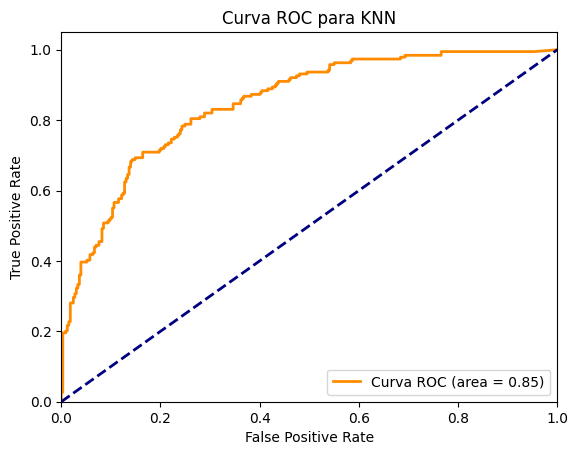

In [ ]:
y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba, 'Curva ROC para KNN')

Number of TP: 189
Number of FP: 329


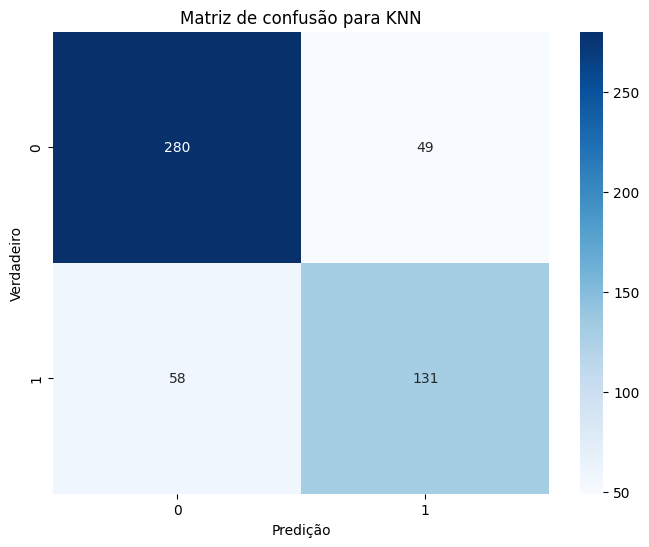

In [ ]:
plot_confusion_matrix(y_pred, y_test, 'Matriz de confusão para KNN')

### SVM

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (only for 'rbf' and 'poly' kernels)
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Melhores parametros:", grid_search.best_params_)
print("Melhor acuracia no cross-validation:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)

y_pred = best_svm.predict(X_test_scaled)
print("-" * 30)
calculate_metrics(y_test, y_pred)

KeyboardInterrupt: 

In [ ]:
y_pred_proba = best_svm.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba, 'Curva ROC para SVM')

In [ ]:
plot_confusion_matrix(y_pred, y_test, 'Matriz de confusão para SVM')

### Rede Neural

melhor até agr:
- dropout: 0.3
- batch normalization antes da ativação
- ativacoes nas camadas ocultas: relu
- tamanho camada oculta final: 64
- ativacao saida: sigmoid
- learning rate: 1e-04

In [10]:
# reprodutibilidade
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
dropout_rate = 0.5

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),

    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout_rate),

    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout_rate),

    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout_rate),

    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout_rate),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-04),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    X_train_scaled, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(np.int32)
calculate_metrics(y_test, y_pred)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5125 - loss: 0.8432 - val_accuracy: 0.4249 - val_loss: 0.7316
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5263 - loss: 0.8128 - val_accuracy: 0.4426 - val_loss: 0.7175
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5246 - loss: 0.8005 - val_accuracy: 0.4872 - val_loss: 0.6963
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5655 - loss: 0.7419 - val_accuracy: 0.5537 - val_loss: 0.6714
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5814 - loss: 0.7199 - val_accuracy: 0.6038 - val_loss: 0.6504
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5966 - loss: 0.6874 - val_accuracy: 0.6557 - val_loss: 0.6165
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6098 - loss: 0.6785 - val_accuracy: 0.6886 - val_loss: 0.5916
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6624 - loss: 0.6285 - val_accuracy: 0.

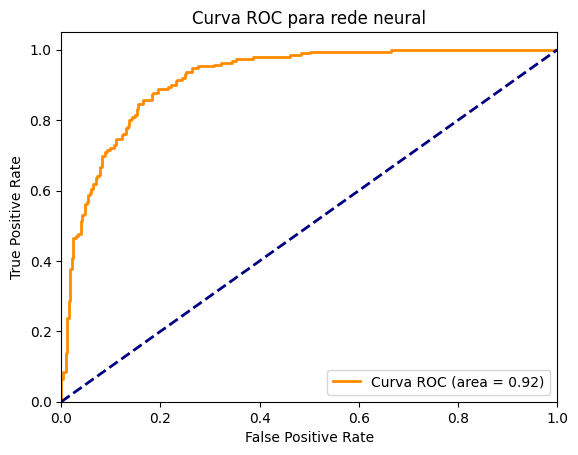

In [16]:
plot_roc_curve(y_test, y_pred_proba, 'Curva ROC para rede neural')

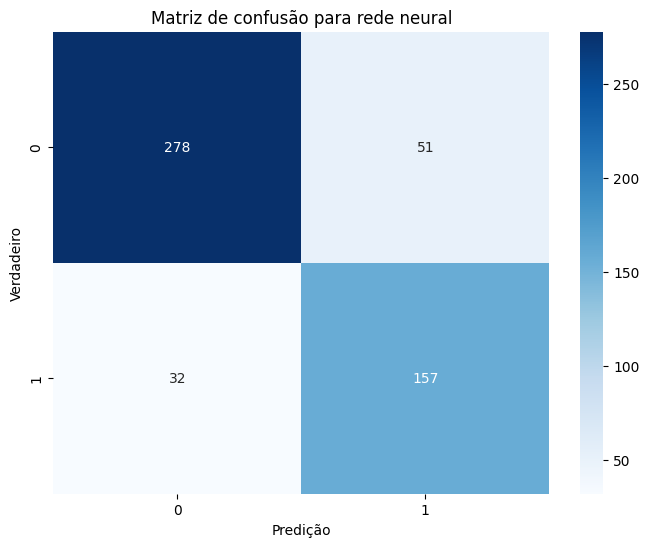

In [17]:
plot_confusion_matrix(y_pred, y_test, 'Matriz de confusão para rede neural')